# Лабораторная работа №1
## Выполнила студентка группы БСТ1903 Мисевич И.М.
### Задание 1
1. Создать Jupyter Notebook со следующим наименованием: Lab1_Группа_ФИО
2. Создать новую ячейку с помощью кнопки 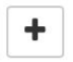
3. В созданной ячейке по указанной ниже форме заполните оглавление файла,
заменив наименование группы и вписав свое ФИО,
после чего создайте еще одну ячейку и напишите следующий код:
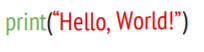
4. С помощью кнопки 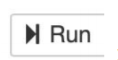 запустите выполнение всех ячеек.
5. После выполнения у вас должна отформатироваться ячейка с оглавлением и
должен выполниться “Hello, World!” 

In [6]:
print('Hello World!')

Hello World!


### Задание №2:
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры m, n, min_limit, max_limit, где m и n указывают размер
матрицы, а min_lim и max_lim - минимальное и максимальное значение для
генерируемого числа . По умолчанию при отсутствии параметров принимать следующие
значения:
m = 50
n = 50
min_limit = -250
max_limit = 1000 + (номер своего варианта)

In [7]:
import random
import numpy
def GenRndmMatrix(m = 50, n = 50, min_limit = -250, max_limit = 1010):
    matrix = numpy.empty((m, n))
    for i in range(m):
        for j in range(n):
            matrix[i][j] = random.randint(min_limit, max_limit)
    return matrix.astype(int)

### Задание №3:
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.
Методы:
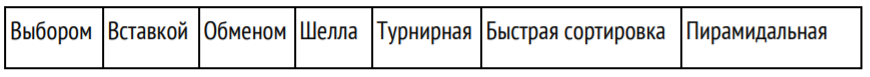

In [8]:
# Сортировка выбором
def selection_sort(row):    
    for i in range(len(row)):
        smallest = i
        for j in range(i + 1, len(row)):
            if row[j] < row[smallest]:
                smallest = j
        row[i], row[smallest] = row[smallest], row[i]

In [9]:
#Сортировка вставкой
def insertion_sort(row):
    for i in range(len(row)):
        j = i - 1
        key = row[i]
        while row[j] > key and j >= 0:
            row[j + 1] = row[j]
            j -= 1
            row[j + 1] = key

In [10]:
#Сортировка обменом
def bubble_sort(row):
    i, size = 1, len(row)
    while i < size:
        if row[i - 1] > row[i]:
            row[i - 1], row[i] = row[i], row[i - 1]
            i = 1
        else:
            i += 1

In [11]:
#Сортировка Шелла
def shell_sort(arr):
    last_index = len(arr) - 1
    step = len(arr) // 2
    while step > 0:
        for i in range(step, last_index + 1, 1):
            j = i
            delta = j - step
            while delta >= 0 and arr[delta] > arr[j]:
                arr[delta], arr[j] = arr[j], arr[delta]
                j = delta
                delta = j - step
        step //= 2

In [12]:
#Турнирная сортировка
def tournament_sort(arr):
    tree = [None] * 2 * (len(arr) + len(arr) % 2)
    index = len(tree) - len(arr) - len(arr) % 2

    for i, v in enumerate(arr):
        tree[index + i] = (i, v)

    for j in range(len(arr)):
        n = len(arr)
        index = len(tree) - len(arr) - len(arr) % 2
        while index > -1:
            n = (n + 1) // 2
            for i in range(n):
                i = max(index + i * 2, 1) # на последней итерация index + i * 2 = 0
                if tree[i] != None and tree[i + 1] != None:
                    if tree[i][1] < tree[i + 1][1]:
                        tree[i // 2] = tree[i]
                    else:
                        tree[i // 2] = tree[i + 1]
                else:
                    tree[i // 2] = tree[i] if tree[i] != None else tree[i + 1]
            index -= n

        index, x = tree[0]
        arr[j] = x
        tree[len(tree) - len(arr) - len(arr) % 2 + index] = None

In [13]:
#Быстрая сортировка
def partition(arr, low, high):
    pivot = arr[(low + high) // 2]
    i = low - 1
    j = high + 1
    while True:
        i += 1
        while arr[i] < pivot:
            i += 1
        j -= 1
        while arr[j] > pivot:
            j -= 1
        if i >= j:
            return j
        arr[i], arr[j] = arr[j], arr[i]
def quick_sort(arr):
    def _quick_sort(items, low, high):
        if low < high:
            split_index = partition(items, low, high)
            _quick_sort(items, low, split_index)
            _quick_sort(items, split_index + 1, high)
    _quick_sort(arr, 0, len(arr) - 1)

In [14]:
#Пирамидальная сортировка
def heapify(nums, heap_size, root_index):
    largest = root_index
    left_child = (2 * root_index) + 1
    right_child = (2 * root_index) + 2
    if left_child < heap_size and nums[left_child] > nums[largest]:
        largest = left_child
    if right_child < heap_size and nums[right_child] > nums[largest]:
        largest = right_child
    if largest != root_index:
        nums[root_index], nums[largest] = nums[largest], nums[root_index]
        heapify(nums, heap_size, largest)
def heap_sort(nums):
    n = len(nums)
    for i in range(n, -1, -1):
        heapify(nums, n, i)
    for i in range(n - 1, 0, -1):
        nums[i], nums[0] = nums[0], nums[i]
        heapify(nums, i, 0)

In [15]:
import time
def CheckSort(sort, name, matrix):
    Copy_Matrix = matrix.copy()
    Start = time.perf_counter()
    for row in Copy_Matrix:
        sort(row)
    Finish = time.perf_counter()
    timeSpend = Finish - Start
    print(name, timeSpend)

In [17]:
NewMatrix = GenRndmMatrix()

CheckSort(selection_sort, "Сортировка выбором", NewMatrix)
CheckSort(insertion_sort, "Сортировка вставкой", NewMatrix)
CheckSort(bubble_sort, "Сортировка обменом", NewMatrix)
CheckSort(shell_sort, "Сортировка Шелла", NewMatrix)
CheckSort(tournament_sort, "Турнирная сортировка", NewMatrix)
CheckSort(quick_sort, "Быстрая сортировка", NewMatrix)
CheckSort(heap_sort, "Пирамидальная сортировка", NewMatrix)

Сортировка выбором 0.05322770000020682
Сортировка вставкой 0.08045429999947373
Сортировка обменом 0.4986386999989918
Сортировка Шелла 0.014752400000361376
Турнирная сортировка 0.1422686000005342
Быстрая сортировка 0.011595699999816134
Пирамидальная сортировка 0.024980300000606803


### Задание №4:
Создать публичный репозиторий на github, и запушить выполненное задание в
.ipynb формате.

https://github.com/MisevichIra/SAOD